In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from enum import Enum
import numpy as np


fast_gnp_random_graph 
scale_free_graph

gnp_random_graph 
dense_gnm_random_graph 
barabasi_albert_graph 

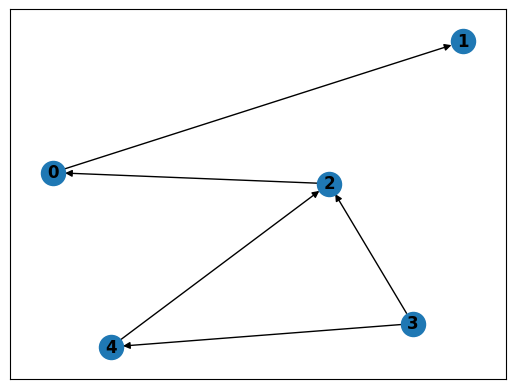

In [2]:
fig, ax = plt.subplots()

graph = nx.fast_gnp_random_graph(n=5, p=0.2, seed=1, directed=True)
position = nx.spring_layout(graph,seed=5)

nx.draw_networkx_nodes(graph, position, ax=ax)
nx.draw_networkx_labels(graph, position, ax=ax, font_weight='bold')
nx.draw_networkx_edges(graph, position, ax=ax, edgelist= graph.edges())

plt.show()

In [19]:
class State(Enum):
    SOURCE = 0
    SUSCEPTIBLE = 1
    INFECTED = 2
    RECOVERED = 3
    
STATE2COLOR = {
    State.SOURCE: "red",
    State.SUSCEPTIBLE: "lightsteelblue",
    State.INFECTED: "darkorange",
    State.RECOVERED: "green"
}

In [20]:
np.random.seed(1)

source_node = 3

for node in graph.nodes:   

    if node == source_node:
        graph.nodes[node]["state"] = State.SOURCE
        graph.nodes[node]["resistance"] = 0
    else:
        graph.nodes[node]["state"] = State.SUSCEPTIBLE
        graph.nodes[node]["resistance"] = np.random.random()

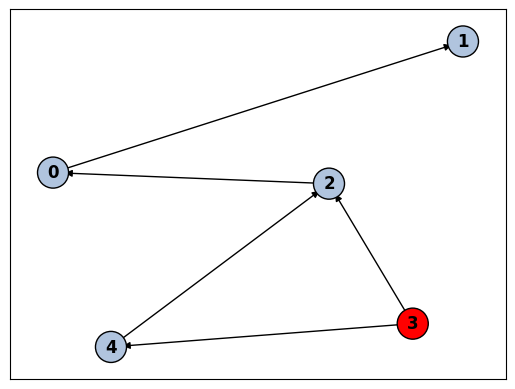

In [21]:
fig, ax = plt.subplots()

position = nx.spring_layout(graph, seed=5)

node_colors = [STATE2COLOR[graph.nodes[node]["state"]] for node in graph.nodes]

nx.draw_networkx_nodes(graph, position, ax=ax, node_color=node_colors, edgecolors="black", node_size=500)
nx.draw_networkx_labels(graph, position, ax=ax, font_weight='bold')
nx.draw_networkx_edges(graph, position, ax=ax) #, edgelist=graph.edges()

plt.show()

In [22]:
def change_states(graph, graph_copy, node):
    node_state = graph.nodes[node]["state"]

    if node_state == State.SOURCE:
        return
    
    elif node_state == State.SUSCEPTIBLE:

        predecessor_states = {graph_copy.nodes[pre]["state"] for pre in set(graph.predecessors(node))}

        if {State.SOURCE, State.INFECTED} & predecessor_states:
            if graph.nodes[node]["resistance"] < np.random.random():
                graph_copy.nodes[node]["state"] = State.INFECTED

    elif node_state == State.INFECTED:
        if graph.nodes[node]["resistance"] > np.random.random():
            graph_copy.nodes[node]["state"] = State.RECOVERED
        else:
            graph.nodes[node]["resistance"] = max(graph.nodes[node]["resistance"]/2, graph.nodes[node]["resistance"]-np.random.random())
        
    elif node_state == State.RECOVERED:
        if graph.nodes[node]["resistance"] > np.random.random():
            graph.nodes[node]["resistance"] = min(graph.nodes[node]["resistance"]+np.random.random, 2*graph.nodes[node]["resistance"], 1)
        else: 
            graph_copy.nodes[node]["state"] = State.SUSCEPTIBLE
    


In [23]:
def visualize_graph(gr):
    fig, ax = plt.subplots()

    position = nx.spring_layout(gr, seed=5)

    node_colors = [STATE2COLOR[gr.nodes[node]["state"]] for node in gr.nodes]

    nx.draw_networkx_nodes(gr, position, ax=ax, node_color=node_colors, edgecolors="black", node_size=500)
    nx.draw_networkx_labels(gr, position, ax=ax, font_weight='bold')
    nx.draw_networkx_edges(gr, position, ax=ax) #, edgelist=graph.edges()

    resistance_labels = {node: f"{gr.nodes[node]['resistance']:.7f}" for node in gr.nodes}
    label_offset = 0.12  
    pos_labels = {node: (x, y + label_offset) for node, (x, y) in position.items()} 
    
    nx.draw_networkx_labels(gr, pos_labels, ax=ax, labels=resistance_labels, font_size=10, font_color='#595959', font_weight='bold')
    
    plt.show()

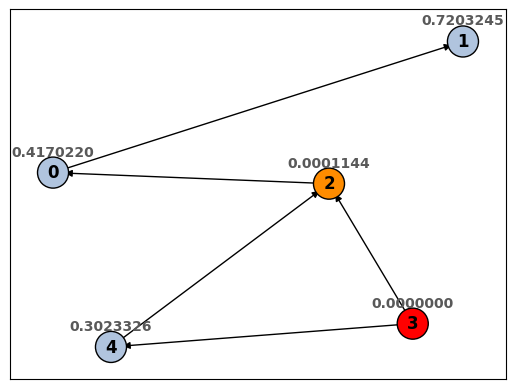

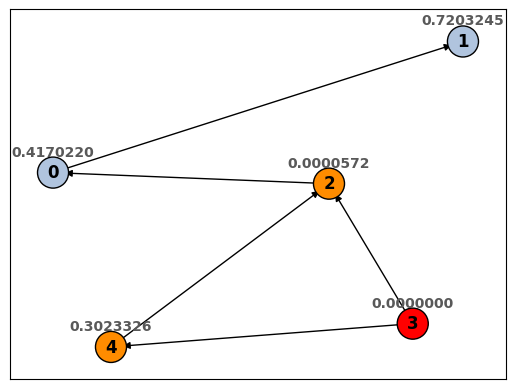

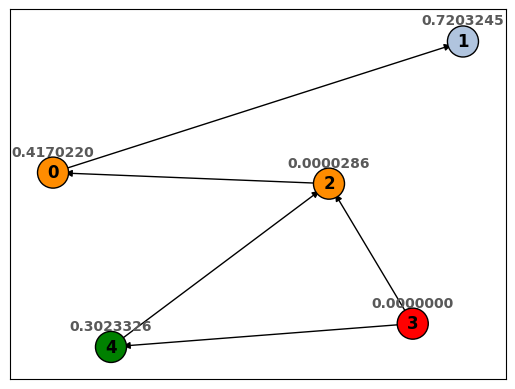

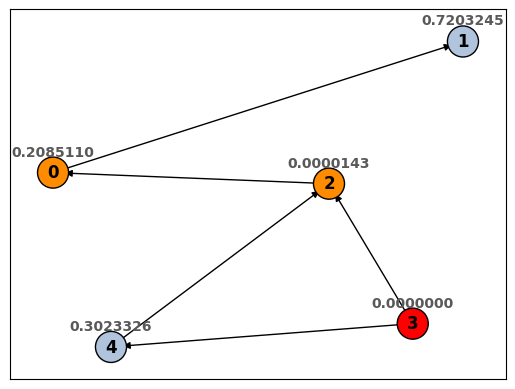

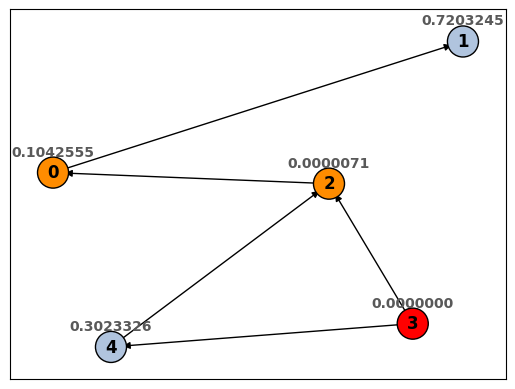

In [8]:
for step in range(5):
    graph_copy = graph.copy()
    for node in graph.nodes:

        change_states(graph, graph_copy, node)
        
    for node in graph.nodes:
        graph.nodes[node]["state"] = graph_copy.nodes[node]["state"]
    
    visualize_graph(graph)